# Introduction to Planimetric Transitions

In road axis design, ensuring a **smooth and safe path** for the driver requires specific criteria for planimetric design, with particular attention to the following cases:

- **Transitions between straight sections and circular curves**  
  The use of a **clothoid** as a transition curve ensures a gradual variation in curvature, improving both **safety** and **driving comfort**.

- **Transitions between consecutive curves in the same direction**  
  When two circular curves with different radii follow each other, a **clothoid transition** is necessary to avoid abrupt curvature changes.

- **Transitions between consecutive curves in opposite directions (Flexure Clothoid)**  
  When two curves of opposite direction follow each other, the design solution may include:  
  - **An intermediate straight section**, ensuring enough separation to prevent abrupt maneuvers.  
  - **A direct transition using a flexure clothoid**, allowing a **continuous variation of curvature** through a **zero-curvature point**.


Below, we will examine some **fundamental geometric problems** related to **circular arc transitions**, followed by the analysis of **variable curvature curves**:

1. **Straight section transitions using circular arcs**  
2. **Introduction of clothoids**  
3. **Complex transitions between consecutive curves (same & opposite directions)**

---
# 1. Straight Section Transitions Using Circular Arcs

In this section, we analyze the problem of connecting two straight road segments using a **circular arc**. This study is divided into two parts:
- 1.1 Connecting straight sections with a circular arc
- 1.2 Constraining the circular transition

## 1.1 Connecting Straight Sections with a Circular Arc

The simplest case consists of defining the geometry of a circular transition between two straight sections. This is characterized by the **coordinates of three key points** and the **radius R** of the circular arc:

- **P₀**: The starting point of the first straight section.
- **P₁**: The intersection of the two straight sections.
- **P₂**: The endpoint of the second straight section.
- **R**: The prescribed radius of the circular arc, which influences the curvature and length of the transition.

### Transition Geometry Definition

To define the transition geometry, we first compute the **intersection angle (α)** at **P₁**, which determines the deflection between the two segments. Given **α** and the radius **R**, we derive:

- **Central angle (θ):** The circular arc's subtended angle at its center.  


   $$\theta = \pi - \alpha$$

- **Tangent length (T):** Distance from **P₁** to the arc's tangent points.  


   $$  T = R \cdot \tan\left(\frac{\theta}{2}\right)$$

- **Bisector length (B):** Perpendicular distance from **P₁** to the arc's midpoint.  


  $$B = R  / \cos\left(\frac{\alpha}{2}\right)$$

The following figure illustrates these relationships, which we will compute using the equations for θ, T, and B introduced above.

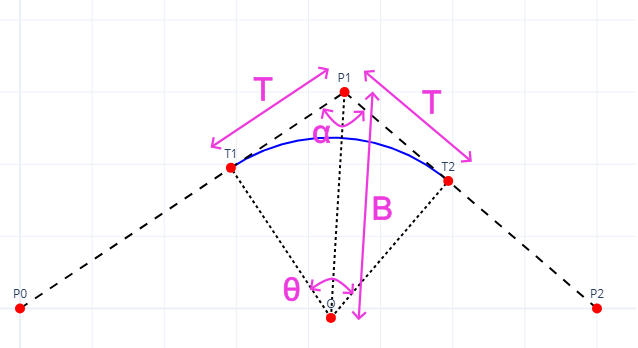

**Figure 1***: Geometric representation of the transition Curve.*

---
### **Computational Steps**
To generate the circular transition, we perform the following steps:

1. **Compute the intersection angle (α)** between the two straight road sections.
2. **Calculate the central angle (θ)**, which is the angle subtended by the circular arc at its center. This determines how much of the circle is used.
3. **Determine the tangent length (T) and bisector length (B)** based on θ and R.
4. **Find the center of the circular arc (O)** using the bisector method.
5. **Determine the tangent points (T₁ and T₂)** where the circular arc connects to the straight sections.
6. **Compute the coordinates of the circular arc** in the global reference system using parametric equations.
7. **Visualize the transition** by plotting the arc along with the straight sections and key points.

All these computational steps are implemented in the `CircularTransition` class, which is part of the `functions.py` module.  
The following example demonstrates its usage.

---

P0: [0 0], P1: [45 30], P2: [80  0]
Radius (R): 25
Intersection Angle α: 105.71 degrees
Central Angle θ: 74.29 degrees
Tangent Length T: 18.9387
Bisector Length B: 31.3636
Circle Center (O): [43.10955122 -1.30655982]
Tangent Points: T1 = [29.24204631 19.49469754], T2 = [59.37933555 17.67485524]


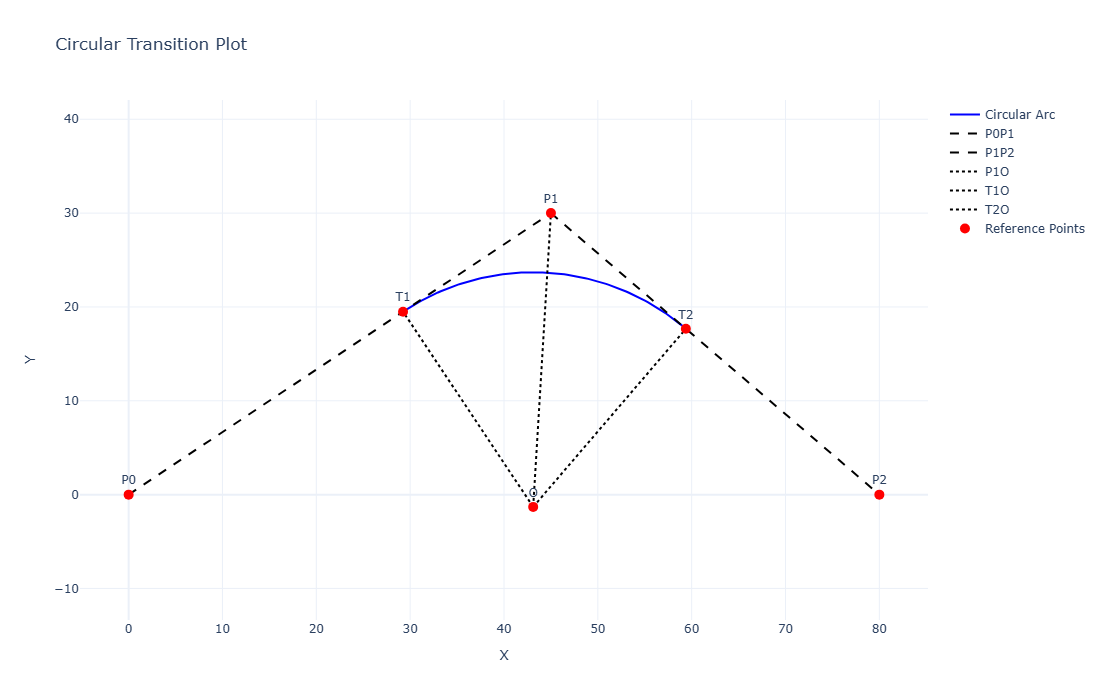

In [13]:
# Import necessary modules
from functions import CircularTransition  # Class handling circular transitions
import numpy as np  # Library for numerical operations

# Define problem data  
P0 = [0, 0]
P1 = [45, 30]
P2 = [80, 0]
R = 25

# Create the circular transition object 
# (This automatically computes the transition parameters)
transition = CircularTransition(P0, P1, P2, R)

# Visualize the transition (arc, tangent points, and straight sections).
# This visualization uses Plotly (import plotly.graph_objects) and is visible only when the file is opened in Jupyter Notebook.
transition.Plot()

---
### Considerations on Tangent Points Position
It is important to note that if the computed tangent length (T) is greater than the length of segments P₀P₁ or P₁P₂, the tangent points T₁ and T₂ will fall outside these segments.

This is particularly relevant in **3D modeling software**, where road alignments are often defined using **base polylines**. If a polyline segment is not long enough to accommodate a circular transition, the resulting geometry may become **inconsistent**, leading to undesired distortions or incorrect alignments in the model.

---
## 1.2 Constraining the circular transition

In this section, we define the approach to determine the unique radius $R^*$ of a circular transition under specific geometric constraints. Instead of assigning $R^*$ arbitrarily, we derive it from fundamental geometric properties to ensure a systematic and precise design.

We focus on two key cases:

1. **Circle Passing Through a Specific Point $P_c$**  
   The goal is to determine $R^*$ so that the circular transition passes through a given control point $P_c$. This is particularly useful in road alignment design, where specific waypoints must be respected.

2. **Circle Tangent to a Constraining Tangent Segment (CTS)**  
   The CTS acts as a boundary for the circular transition, limiting how far the curve extends. The goal is to compute $R^*$ so that the circle remains tangent to this segment, ensuring a controlled and precise transition.

Next, we will derive the mathematical expressions needed to compute $R^*$ for each case, forming the basis for computational algorithms that automate radius determination.

## 1.2.1 Circle Passing Through a Specific Point

To determine the unique radius $R^*$ such that the circular transition passes through a predefined point $P_c$, we consider the following properties:

- The center $O$ of the circular transition must lie along the **bisector** of the angle formed by the two road segments.
- The distance between $O$ and $P_c$ must be exactly $R^*$.

### **Mathematical Formulation**

As previously defined, $P_1$ represents the intersection of the two road segments and $\alpha$ is the angle at $P_1$ between segments $P_0P_1$ and $P_1P_2$. To solve for $R^*$, we introduce the following characteristic angles of the triangle $P_c P_1 O$, as illustrated in the corresponding diagram:

- $\omega$: The angle between vectors $P_1P_c$ and $P_1O$.
- $\varphi$: The angle at $P_c$ in the triangle $O P_c P_1$, which must always be greater than 90 degrees.
- $\gamma$: Computed as $\gamma = \pi -\varphi - \omega$.

From the geometric analysis, we obtain the following equations:

$$
\sin(\varphi) = \frac{\sin(\theta)}{\sin(\alpha /2)}
$$

From which we derive the radius $R^*$:

$$
R^* = \frac{\|P_c - P_1\| \cdot \sin(\theta)}{\sin(\gamma)}
$$

Since $\varphi$ must always be greater than 90 degrees, particular care must be taken when applying $\arcsin(\varphi)$ in computations to ensure the correct quadrant is considered.

These equations are implemented in the method `CircularTransition.FixPoint` within the `functions.py` module, specifically developed to automate this calculation and ensure consistency in circular transition design.

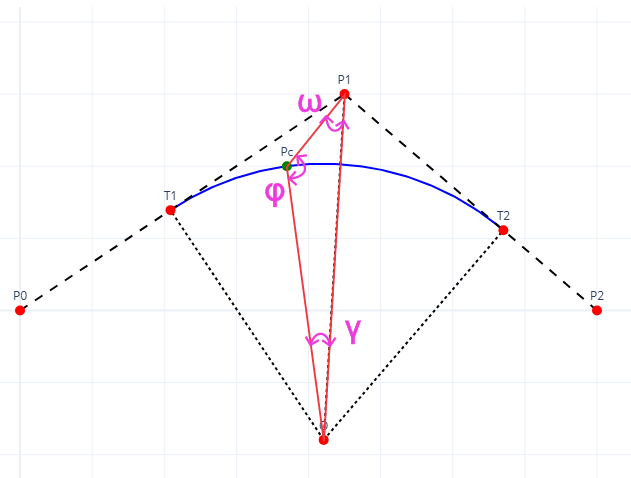

**Figure 2***: Geometric representation of the transition constraints in a Point.*

---

alpha (radians): 1.8449637779145553, alpha (degrees): 105.70863782901574
omega (radians): 0.6144291079335009, omega (degrees): 35.20419469457773
phi (radians): 0.8084743742653222, phi (degrees): 46.3221694898831
gamma (radians): 0.1940452663318213, gamma (degrees): 11.117974795305368
R_star: 38.28610144381914
P0: [0 0], P1: [45 30], P2: [80  0]
Radius (R): 38.28610144381914
Intersection Angle α: 105.71 degrees
Central Angle θ: 74.29 degrees
Tangent Length T: 29.0036
Bisector Length B: 48.0316
Circle Center (O): [ 42.10488344 -17.944245  ]
Tangent Points: T1 = [20.86757546 13.91171697], T2 = [67.02114799 11.1247303 ]


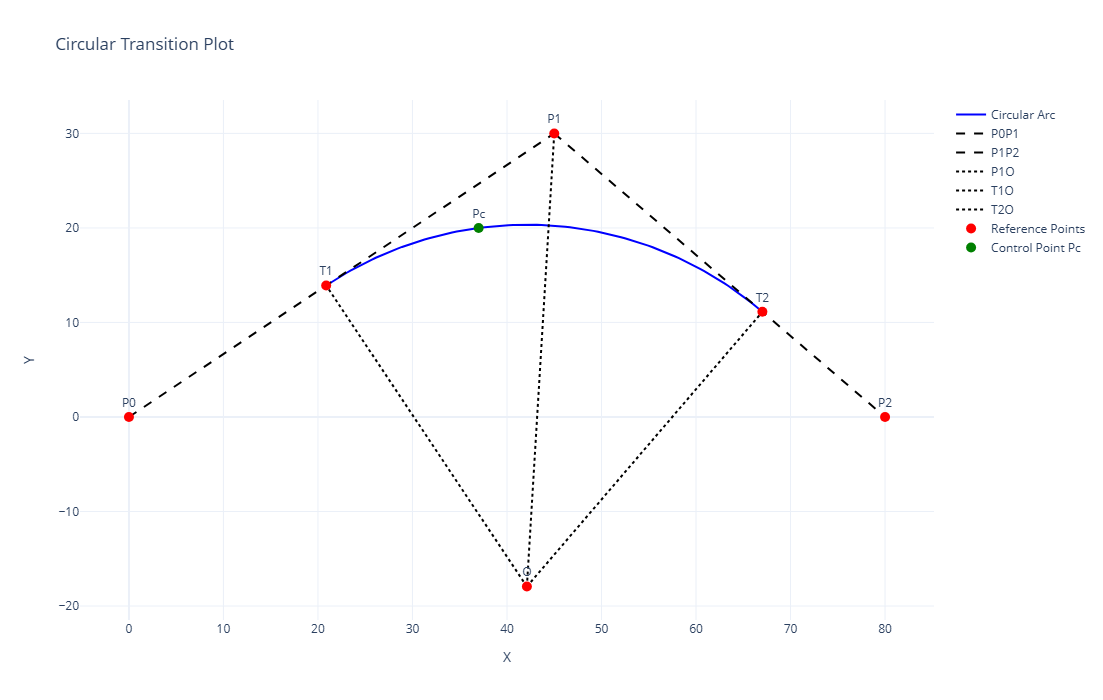

In [14]:
# Define problem data
P0 = [0, 0]
P1 = [45, 30]
P2 = [80, 0]
Pc = [37, 20]  # User-defined control point

# Create the transition using FixPoint
transition = CircularTransition.FixPoint(P0, P1, P2, Pc)

# Visualize the result including the control point Pc
transition.Plot(Pc=Pc)

## 1.2.2 Circle Tangent to a Constraining Tangent Segment (CTS)

In some cases, a circular transition must be **tangent to a constraining tangent segment (CTS)**. This ensures that the circular arc does not extend beyond a predefined boundary while maintaining a smooth connection between road segments.

### **Problem Definition**
A **Constraining Tangent Segment (CTS)** acts as a geometric boundary that the circular transition must be tangent to. This is particularly useful in road design when:
- The road alignment must avoid a specific area.
- The curvature of the transition must be constrained to meet safety or design regulations.
- The transition must smoothly connect two straight sections without exceeding a given limit.

### **Mathematical Formulation**
To determine the unique radius $R^*$ that ensures tangency to the CTS, we follow these steps:

1. **Define Points $P_A$ and $P_B$**:  
   These are the **intersection points** of the CTS with the straight road segments $P_0P_1$ and $P_1P_2$.  
   They are computed using the parametric equations of the lines:
   
   $$ P_A = P_1 + t_A \cdot (P_0 - P_1), \quad P_B = P_1 + t_B \cdot (P_2 - P_1) $$

   where $t_A$ and $t_B$ are user-defined parameters that locate $P_A$ and $P_B$ along the respective segments.

2. **Compute the Area of Triangle $P_A, P_1, P_B$**:

   $$ A_{CTS} = \frac{1}{2} \left| P_A^x (P_1^y - P_B^y) + P_1^x (P_B^y - P_A^y) + P_B^x (P_A^y - P_1^y) \right| $$

3. **Compute the Perimeter of Triangle $P_A, P_1, P_B$**:

   $$ P_{CTS} = \| P_A - P_1 \| + \| P_B - P_1 \| + \| P_A - P_B \| $$

4. **Compute the Semiperimeter**:

   $$ S_{CTS} = \frac{P_{CTS}}{2} $$

5. **Compute the Unique Radius $R^*$**:

   $$ R^* = \frac{A_{CTS}}{S_{CTS} - \| P_A - P_B \|} $$

### **Computational Approach**
To implement this method computationally, we introduce the function:
- `CircularTransition.ConstrainTangentSegment(P0, P1, P2, tA, tB)`, which:
  - Computes $P_A$ and $P_B$ based on user-defined parameters $t_A$ and $t_B$.
  - Calculates $A_{CTS}$, $P_{CTS}$, and $S_{CTS}$.
  - Determines $R^*$ using the formula above.
  - Returns a new instance of `CircularTransition` with the computed radius.

This method ensures that the generated circular arc remains tangent to the CTS, providing a structured and controlled transition between road segments.

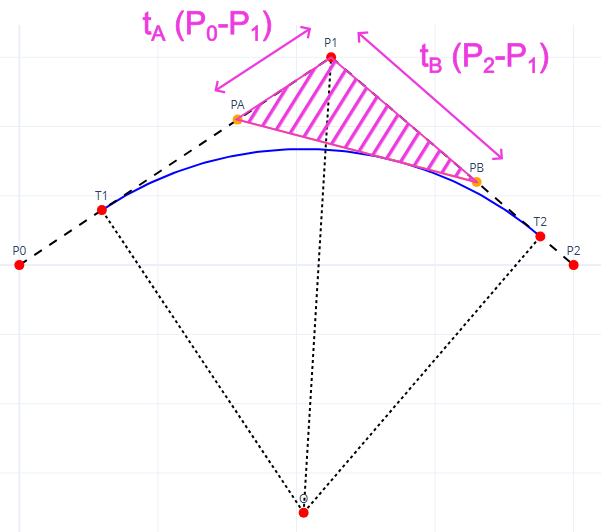

**Figure 2**: Geometric representation of the transition constrained by a tangent segment (CTS).


---

R_star: 52.497130907691776
P0: [0 0], P1: [45 30], P2: [80  0]
Radius (R): 52.497130907691776
Intersection Angle α: 105.71 degrees
Central Angle θ: 74.29 degrees
Tangent Length T: 39.7691
Bisector Length B: 65.8599
Circle Center (O): [ 41.03027451 -35.74018276]
Tangent Points: T1 = [11.91010569  7.94007046], T2 = [75.19495443  4.11861048]


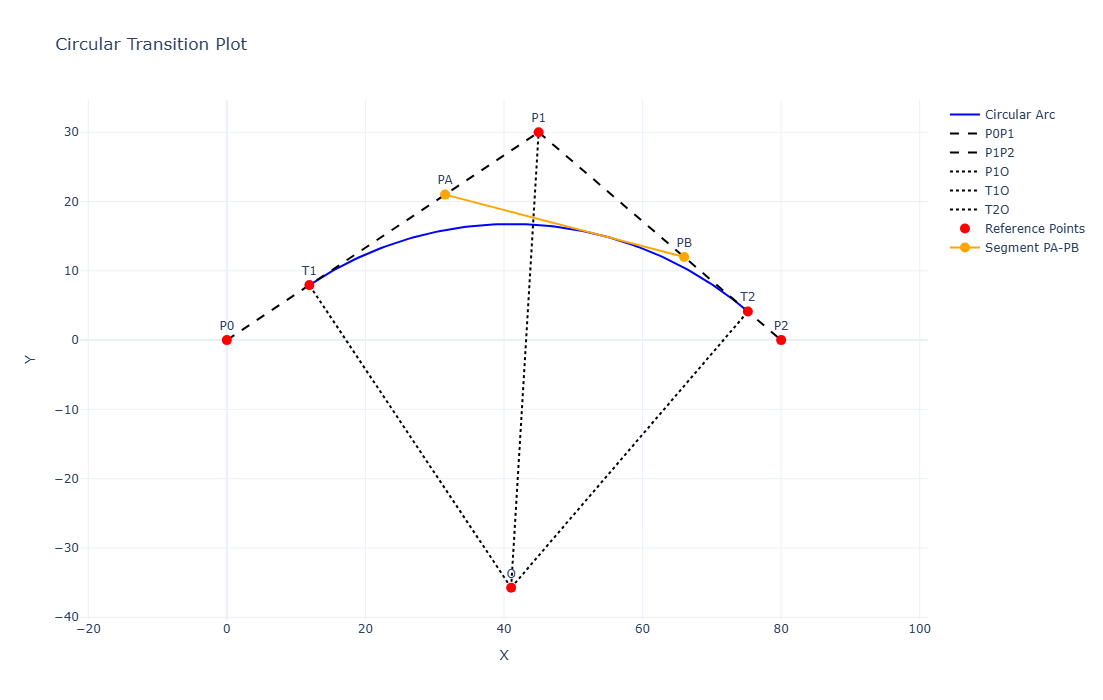

In [15]:
# Define problem data
P0 = [0, 0]
P1 = [45, 30]
P2 = [80, 0]
tA = 0.3  # User-defined parameter for PA
tB = 0.6  # User-defined parameter for PB

# Create the transition using ConstrainTangentSegment
transition, PA, PB = CircularTransition.ConstrainTangentSegment(P0, P1, P2, tA, tB)

# Visualize the result including the segment PA-PB
transition.Plot(PA=PA, PB=PB)

# 2. Introduction of clothoids

In this section, we present the **approximate equations** used to compute clothoid transitions without relying on Fresnel integrals. These formulas allow us to determine the clothoid's shape directly using a truncated power series expansion.


## **Clothoid Length**
The total length \( L \) of the clothoid is given by:
\[
L = \frac{A^2}{R}
\]
where:  
- \( A \) is the clothoid parameter (defines the rate of curvature increase).
- \( R \) is the radius of the circular arc.

---

## **2️ Tau Parameter**
The **normalized parameter** \( \tau \) is used in the power series expansion:
\[
\tau = \frac{L^2}{2A^2}
\]
This allows us to express the clothoid's shape in a dimensionless form.

---

## ** Clothoid Coordinates**
The **coordinates** \( X_f \) and \( Y_f \) at the endpoint of the clothoid are computed using **series approximations**:

\[
X_f = A\sqrt{2\tau} \sum_{i=1}^{10} \left[ (-1)^{i-1} \frac{\tau^{2i-2}}{(4i-3)(2i-2)!} \right]
\]

\[
Y_f = A\sqrt{2\tau} \sum_{i=1}^{10} \left[ (-1)^{i+1} \frac{\tau^{2i-1}}{(4i-1)(2i-2)!} \right]
\]

These equations provide an accurate approximation of the clothoid's **evolving curvature**.

---

## ** Curvature Variation \(\Delta R\)**
The deviation of the clothoid's curvature from the circular arc can be estimated as:

\[
\Delta R = \frac{A^4}{24 R^3} \sum_{i=1}^{10} \left[ (-1)^{i+1} \frac{6\tau^{2i-2}}{(4i-1)(2i)!} \right]
\]

This term is useful for understanding the transition between straight and curved sections.

---

## ** Midpoint of circle*
A useful **reference coordinate** along the clothoid is given by:

\[
X_M = \frac{A\sqrt{2\tau}}{2} \sum_{i=1}^{10} \left[ (-1)^{i+1} \frac{\tau^{2i-2}}{(4i-3)(2i-2)!} \right]
\]

This can help estimate the shape and progression of the clothoid.

---

## **📌 Key Takeaways**
✅ These approximations allow us to compute clothoid transitions **without Fresnel integrals**.  
✅ The formulas are **accurate up to 10 terms**, which is sufficient for road and railway engineering applications.  
✅ **Next step:** Implement these equations in Python to generate clothoid coordinates!



P0: [0 0], P1: [50 30], P2: [100   0]
Radius (R): 25
Intersection Angle α: 118.07 degrees
Central Angle θ: 61.93 degrees
Tangent Length T: 15.0000
Bisector Length B: 29.1548
Circle Center (O): [50.          0.84524053]
Tangent Points: T1 = [37.13760611 22.28256367], T2 = [62.86239389 22.28256367]

Computing clothoid transition curves...
Final clothoid coordinate (Entry): x' = 5.0930, y' = -0.0004
Final clothoid coordinate (Exit): x' = -3.8197, y' = -0.0003
[DEBUG] Mid_P0P1: [25. 15.], θ_P0P1: 30.96°
[DEBUG] Mid_P1P2: [75. 15.], θ_P1P2: -30.96°
Clothoid computation completed.



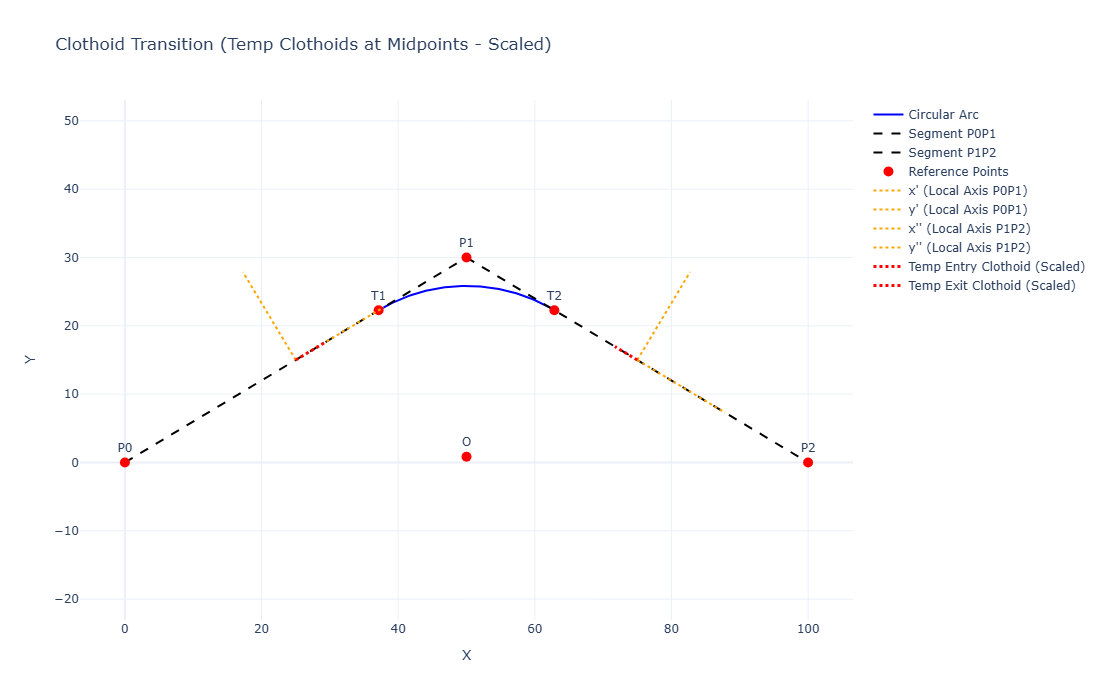

In [16]:
# Define the points and the circle radius
P0 = [0, 0]       # Start of the first straight segment
P1 = [50, 30]     # Transition point
P2 = [100, 0]     # End of the second straight segment
R = 25            # Radius of the circular transition

# Create the CircularTransition object
transition = CircularTransition(P0, P1, P2, R)

# Define entry and exit clothoid parameters
A1 = 400  # Entry clothoid parameter
A2 = 300  # Exit clothoid parameter

# Compute and store the clothoids
transition.add_clothoids(A1, A2)

# Plot the complete solution including clothoids and arc
transition.plotClothoid()